# BENO-Investigation

# Training

In [1]:
import os
os.getcwd()

'/content'

In [2]:
!git clone https://github.com/zihanzhou2002/beno.git

Cloning into 'beno'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 107 (delta 2), reused 2 (delta 2), pack-reused 102 (from 1)
Receiving objects: 100% (107/107), 24.58 MiB | 23.28 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [3]:
%cd /content/beno

/content/beno


In [4]:
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1

In [6]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)


PyTorch version: 2.5.1+cu124
CUDA version: 12.4


In [7]:
# For PyTorch 2.6.0 + CUDA 12.4
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.5.1+cu124.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.5.1+cu124.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.5.1+cu124.html
!pip install torch-geometric
!pip install loguru


Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 104.5 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 56.8 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.8 MB/s eta 0:00:00


In [9]:
import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pprint as pp
from timeit import default_timer
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.utils import scatter  # Not included in the latest version
from torchvision.transforms import GaussianBlur
import sys, os
# from utilities import *
from utilities import MeshGenerator,GaussianNormalizer,LpLoss
from util import record_data, to_cpu, to_np_array, make_dir
from BE_MPNN import HeteroGNS
from BE_MPNN_GPS import HeteroGNSGPS
import random
from loguru import logger
import matplotlib.tri as tri
from torch_geometric.data import HeteroData
from data_setup import make_graph
import warnings
warnings.filterwarnings('ignore')
import pdb
fix_seed = 2023
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)
torch.cuda.manual_seed_all(fix_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


## 1. Set training arguments

In [38]:
class Args:
    epochs = 1000
    lr = 0.00005
    inspect_interval = 100
    id = "0"
    init_boudary_loc = "regular"
    boundary_encoding = "transformer"
    trans_layer = 3
    boundary_dim = 128
    batch_size = 1
    act = "silu"
    nmlp_layers = 3
    ns = 100
    n_heads = 4
    bd_shape = "mix"

args = Args()


## 2. Load Data

We aim to solve a $d$-dimensional-differntiable function $u \in C^d(\mathbb R)$ of $N$ interior grid nodes over an open domain $\Omega$. This paper primarily works with Poisson equation with Dirichlet boundar conditions. E.g. for $d = 2$ the data is
$$ \nabla^2 u ([x_1, x_2, \dots, x_d)]) = f([x_1, x_2, \dots, x_d]), \quad \forall ([x_1, \dots, x_d]) \in \Omega$$
$$ u ([x_1, x_2, \dots, x_d)]) = g([x_1, x_2, \dots, x_d]), \quad \forall ([x_1, \dots, x_d]) \in \partial \Omega.$$

Here we load a sample of 10 4-corner dataset

In [11]:
import zipfile
with zipfile.ZipFile('/content/beno/data/Dirichlet/Dirichlet_N32_data_10.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/beno/data/Dirichlet/10')

with zipfile.ZipFile('/content/beno/data/Dirichlet/Dirichlet_N32_data_100.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/beno/data/Dirichlet/100')
with zipfile.ZipFile('/content/beno/data/Neumann/Neumann_N32_data_100.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/beno/data/Neumann/100')


In [40]:

cwd = os.getcwd()
DATA_PATH = os.path.join(cwd, "data")
f_all = np.load("/content/beno/data/Dirichlet/100/RHS_N32_" + str(args.bd_shape) + "_100.npy") # the source function
sol_all = np.load("/content/beno/data/Dirichlet/100/SOL_N32_" + str(args.bd_shape) + "_100.npy") # the solution
bc_all=np.load("/content/beno/data/Dirichlet/100/BC_N32_" + str(args.bd_shape) + "_100.npy") # the boundary condition
ntrain = 90
ntest =10

In [41]:
gblur = GaussianBlur(kernel_size=5, sigma=5)


batch_size = args.batch_size
batch_size2 = args.batch_size
width = 64
ker_width = 256
depth = 4
edge_features = 7
node_features = 10
ns=args.ns
epochs = args.epochs
learning_rate = args.lr
inspect_interval = args.inspect_interval

runtime = np.zeros(2, )
t1 = default_timer()

resolution = 32
s = resolution
n=s**2


trans_layer = args.trans_layer

path = 'Resolution_' + str(s) + '_poisson' + \
    '_ntrain'+str(ntrain)+'_kerwidth'+str(ker_width) + '_bd_enc_' + args.boundary_encoding + str(args.trans_layer) +\
    '_Rolling' + args.init_boudary_loc+  '_shape' + args.bd_shape +'_ns'+str(args.ns)+\
    '_nheads'+str(args.n_heads)+'_bddim'+str(args.boundary_dim)+"_act"+args.act+'lr'+str(args.lr)+'_nmlp_layers'+str(args.nmlp_layers)+'_epochs' + str(args.epochs)

result_path = os.path.join(cwd, "results")
path_model = os.path.join(result_path,path )
make_dir(path_model)

logger.add(os.path.join('log', '{}.log'.format(
            path)), rotation="500 MB", level="INFO")
logger.info(path)


2025-04-03 11:33:45.465 | INFO     | __main__:<cell line: 0>:37 - Resolution_32_poisson_ntrain90_kerwidth256_bd_enc_transformer3_Rollingregular_shapemix_ns100_nheads4_bddim128_actsilulr5e-05_nmlp_layers3_epochs1000


In [44]:
data_train, data_test, coord_all, u_normalizer = make_graph(f_all, bc_all, sol_all, resolution, ntrain, ntest)

train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(data_test, batch_size=batch_size2, shuffle=False)
t2 = default_timer()

print("Dataset created")
print(f"{len(data_train)} training data")
print(f" Training data examples: {data_train[0]}")
print(f"{len(data_test)} testing data")
print(f" Testing data examples: {data_test[0]}")

Dataset created
90 training data
 Training data examples: HeteroData(
  G1={
    x=[987, 10],
    boundary=[128, 3],
    edge_features=[12001, 7],
    sample_idx=[987],
    edge_index=[2, 12001],
    bd_edge_index=[2, 606],
    bd_edge_features=[606, 7],
  },
  G2={
    x=[987, 10],
    boundary=[128, 3],
    edge_features=[12001, 7],
    sample_idx=[987],
    edge_index=[2, 12001],
    bd_edge_index=[2, 606],
    bd_edge_features=[606, 7],
  },
  G1+2={ y=[987] }
)
10 testing data
 Testing data examples: HeteroData(
  G1={
    x=[1024, 10],
    boundary=[128, 3],
    edge_features=[12408, 7],
    sample_idx=[1024],
    edge_index=[2, 12408],
    bd_edge_index=[2, 606],
    bd_edge_features=[606, 7],
  },
  G2={
    x=[1024, 10],
    boundary=[128, 3],
    edge_features=[12408, 7],
    sample_idx=[1024],
    edge_index=[2, 12408],
    bd_edge_index=[2, 606],
    bd_edge_features=[606, 7],
  },
  G1+2={ y=[1024] }
)


Now check the shape for train and test dataset

### Visualized the dataset as examples

What each component represent
1. G1: the graph that solves $\Delta u = f$ with zero boundary.
    - x = [num\_nodes, num\_node\_features]: features include coordinates, a(x, y), smoothed a, gradients, distance to boundary

    - boundary = [num\_boundary\_nodes, 3] : number of nodes that are on the boundaries, 3 values are x y coordinates and boundar value which is 0

    - edge\_features = [num\_edges, num\_edge\_features]: features are [x1,y1, x2, y2, theta1, theta2, distance]

    - sample\_indx = [num\_nodes]:  Indices of the mesh points being used
    - edge_index = [2, num\_edges]:  Connectivity matrix: 2 rows (source,target), 6733 edges
    - bd_edge_index = [2, num_edges_on_boundary]: connectivity matrix of 2 rows on the boudnary
    - bd_edge_features = [num\_edges\_on\_boundary, num\_edge\_features\_on\_ boundaries]: features are [x1,y1, x2, y2, 0, 0, distance]

2.  G2: that graph solves $\Delta u = 0$ with given boundary condition $g(x)$
    - x = [num\_nodes, num\_node\_features]: Same structure as G1 but different features, zero source term instead of f

    - boundary = [num\_boundary\_nodes, 3] : Boundary points with actual boundary values g(x)

    - edge\_features = [num\_edges, num\_edge\_features]: Same edge features as G1
    - sample\_indx = [num\_nodes]:  Same indices as G1
    - edge_index = [2, num\_edges]:  Same connectivity as G1

3. G1+2: Combined solution target
    - y = [num\_target\_nodes]: values of solution at the target nodes
)


# 5. Load Data and Models

In [45]:
logger.info('preprocessing finished, time used:{}', t2-t1)
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

if args.act == 'leakyrelu':
    activation = nn.LeakyReLU
elif args.act == 'elu':
    activation = nn.ELU
elif args.act == 'relu':
    activation = nn.ReLU
else:
    activation = nn.SiLU

if args.boundary_encoding == 'GPS':
    model = HeteroGNSGPS(nnode_in_features = node_features, nnode_out_features = 1, nedge_in_features = edge_features, nmlp_layers=args.nmlp_layers,
             activation = activation,boundary_dim = args.boundary_dim,trans_layer = trans_layer).to(device)
else:
    model = HeteroGNS(nnode_in_features = node_features, nnode_out_features = 1, nedge_in_features = edge_features, nmlp_layers=args.nmlp_layers,
             activation = activation,boundary_dim = args.boundary_dim,trans_layer = trans_layer).to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=16, T_mult=2)
myloss = LpLoss(size_average=False)
u_normalizer.cuda(device)
ttrain = np.zeros((epochs, ))
ttest = np.zeros((epochs,))
model.train()

data_record = {}

2025-04-03 11:36:04.429 | INFO     | __main__:<cell line: 0>:1 - preprocessing finished, time used:130.66320350099704


In [46]:
model

HeteroGNS(
  (_encoder): Encoder(
    (node_fn): Sequential(
      (0): Sequential(
        (NN-0): Linear(in_features=10, out_features=128, bias=True)
        (Act-0): SiLU()
        (NN-1): Linear(in_features=128, out_features=128, bias=True)
        (Act-1): SiLU()
        (NN-2): Linear(in_features=128, out_features=128, bias=True)
        (Act-2): SiLU()
        (NN-3): Linear(in_features=128, out_features=128, bias=True)
        (Act-3): Identity()
      )
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    )
    (edge_fn): Sequential(
      (0): Sequential(
        (NN-0): Linear(in_features=7, out_features=128, bias=True)
        (Act-0): SiLU()
        (NN-1): Linear(in_features=128, out_features=128, bias=True)
        (Act-1): SiLU()
        (NN-2): Linear(in_features=128, out_features=128, bias=True)
        (Act-2): SiLU()
        (NN-3): Linear(in_features=128, out_features=128, bias=True)
        (Act-3): Identity()
      )
      (1): LayerNorm((128,), e

In [47]:
transformer = model._processor.gnn_stacks[0].boundary_fn
transformer

Transformer(
  (enc_embedding): DataEmbedding_wo_temp(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(3, 128, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TemporalEmbedding(
      (hour_embed): FixedEmbedding(
        (emb): Embedding(24, 128)
      )
      (weekday_embed): FixedEmbedding(
        (emb): Embedding(7, 128)
      )
      (day_embed): FixedEmbedding(
        (emb): Embedding(32, 128)
      )
      (month_embed): FixedEmbedding(
        (emb): Embedding(13, 128)
      )
    )
    (dropout): Dropout(p=0, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-2): 3 x EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): FullAttention(
            (dropout): Dropout(p=0, inplace=False)
          )
          (query_projection): Linear(in_features=128, out_features=128, bias=True)
          (key_

The transformer performs input embedding and passes the embedding into the encoder.

The procedure of embedding is as below

Conduct max pooling on the last dimension

### Now test this new transformer

# 6. Train!

In [48]:
epochs = args.epochs

for ep in range(epochs):
    model.train() #改的
    t1 = default_timer()
    train_mse = 0.0
    train_l2 = 0.0
    for batch in train_loader:

        # n = np.random.randint(2)
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = F.mse_loss(out.view(-1, 1), batch['G1+2'].y.view(-1,1))

        loss.backward()
        l2 = myloss(
            u_normalizer.decode(out.view(batch_size, -1), sample_idx=batch['G1'].sample_idx.view(batch_size, -1)),
            u_normalizer.decode(batch['G1+2'].y.view(batch_size, -1), sample_idx=batch['G1'].sample_idx.view(batch_size, -1))) #G1和G2的sanmple_idx是一样的

        # pdb.set_trace()
        optimizer.step()
        train_mse += loss.item()
        train_l2 += l2.item()

    scheduler.step()
    t2 = default_timer()

    model.eval()
    test_l2 = 0.0
    with torch.no_grad():
        for batch in test_loader:
            batch = batch.to(device)
            out = model(batch)
            out = u_normalizer.decode(out.view(batch_size2,-1), sample_idx=batch['G1'].sample_idx.view(batch_size2,-1))
            test_l2 += myloss(out, batch['G1+2'].y.view(batch_size2, -1)).item()

    t3 = default_timer()
    ttrain[ep] = train_l2/(ntrain)
    ttest[ep] = test_l2/ntest
    logger.info(f"Epoch {ep:03d}     train_Loss: {train_mse/len(train_loader):.6f}  \t train_L2: {train_l2/(ntrain):.6f}\t test_L2: {test_l2/ntest:.6f}")
    record_data(data_record, [ep, train_mse/len(train_loader), train_l2/(ntrain), test_l2/ntest], ["epoch", "train_MSE", "train_L2", "test_L2"])
    if ep % inspect_interval == 0 or ep == epochs - 1:
        record_data(data_record, [ep, to_cpu(model.state_dict())], ["save_epoch", "state_dict"])
        pickle.dump(data_record, open(path_model, "wb"))

2025-04-03 11:36:43.676 | INFO     | __main__:<cell line: 0>:41 - Epoch 000     train_Loss: 0.985401  	 train_L2: 0.992965	 test_L2: 1.004583
2025-04-03 11:37:09.017 | INFO     | __main__:<cell line: 0>:41 - Epoch 001     train_Loss: 0.891612  	 train_L2: 0.963764	 test_L2: 0.976779
2025-04-03 11:37:33.865 | INFO     | __main__:<cell line: 0>:41 - Epoch 002     train_Loss: 0.820770  	 train_L2: 0.930166	 test_L2: 0.991457
2025-04-03 11:37:58.811 | INFO     | __main__:<cell line: 0>:41 - Epoch 003     train_Loss: 0.804251  	 train_L2: 0.924132	 test_L2: 1.108471
2025-04-03 11:38:23.418 | INFO     | __main__:<cell line: 0>:41 - Epoch 004     train_Loss: 0.782224  	 train_L2: 0.913219	 test_L2: 0.992506
2025-04-03 11:38:48.336 | INFO     | __main__:<cell line: 0>:41 - Epoch 005     train_Loss: 0.782157  	 train_L2: 0.912562	 test_L2: 1.010957
2025-04-03 11:39:13.520 | INFO     | __main__:<cell line: 0>:41 - Epoch 006     train_Loss: 0.801435  	 train_L2: 0.923362	 test_L2: 0.993545
2025-0

In [50]:
from google.colab import files
files.download('/content/beno/results/Resolution_32_poisson_ntrain90_kerwidth256_bd_enc_transformer3_Rollingregular_shapemix_ns100_nheads4_bddim128_actsilulr5e-05_nmlp_layers3_epochs1000')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
train_file = 'Resolution_' + str(s) + '_poisson' + \
    '_ntrain'+str(ntrain)+'_kerwidth'+str(ker_width) + '_bd_enc_' + args.boundary_encoding + str(args.trans_layer) +\
    '_Rolling' + args.init_boudary_loc+ '_shape' + args.bd_shape +'_ns'+str(args.ns)+\
    '_nheads'+str(args.n_heads)+'_bddim'+str(args.boundary_dim)+"_act"+args.act+'lr'+str(args.lr)+'_nmlp_layers'+str(args.nmlp_layers)+ '_train.npy'

test_file = 'Resolution_' + str(s) + '_poisson' + \
    '_ntrain'+str(ntrain)+'_kerwidth'+str(ker_width) + '_bd_enc_' + args.boundary_encoding + str(args.trans_layer) +\
    '_Rolling' + args.init_boudary_loc + '_shape' + args.bd_shape +'_ns'+str(args.ns)+\
    '_nheads'+str(args.n_heads)+'_bddim'+str(args.boundary_dim)+"_act"+args.act+'lr'+str(args.lr)+'_nmlp_layers'+str(args.nmlp_layers)+ '_test.npy'

result_path = os.path.join(cwd, "log")
train_path = os.path.join(result_path,train_file)
test_path = os.path.join(result_path, test_file)
np.save(train_path, ttrain)
np.save(test_path, ttest)

In [22]:
print(f"Train: {np.average(ttrain)} +- {np.std(ttrain)}")
print(f"Test: {np.average(ttest)} +- {np.std(ttest)}")

Train: 0.3318835457166864 +- 0.19431179977417457
Test: 1.4155548192620278 +- 0.08913655603435247


### Try other shape

In [ ]:
test_l2 = 0.0
test_mse = 0.0

with torch.no_grad():
    for batch in train_loader:
        batch = batch.to(device)
        out = model(batch)
        loss = F.mse_loss(out.view(-1, 1), batch['G1+2'].y.view(-1,1))
        test_mse += loss.item()
        out = u_normalizer.decode(out.view(batch_size2,-1), sample_idx=batch['G1'].sample_idx.view(batch_size2,-1))
        test_l2 += myloss(out, batch['G1+2'].y.view(batch_size2, -1)).item()

    for batch in test_loader:
        batch = batch.to(device)
        out = model(batch)
        loss = F.mse_loss(out.view(-1, 1), batch['G1+2'].y.view(-1,1))
        test_mse += loss.item()
        out = u_normalizer.decode(out.view(batch_size2,-1), sample_idx=batch['G1'].sample_idx.view(batch_size2,-1))
        test_l2 += myloss(out, batch['G1+2'].y.view(batch_size2, -1)).item()

print(f"l2 {test_l2 / 100:.6f}, mse { test_mse / 100 :.6f}")

l2 1.033591, mse 0.651378


## Plot Solution vs Prediction

Shape: 0c
Test MSE: 0.841001
Test L2: 1.061191
Shape: 1c
Test MSE: 0.747296
Test L2: 1.014390
Shape: 2c
Test MSE: 0.639000
Test L2: 1.009993
Shape: 3c
Test MSE: 0.641897
Test L2: 1.049543
Shape: 4c
Test MSE: 0.129172
Test L2: 1.041544
Shape: mix
Test MSE: 0.638030
Test L2: 1.035754


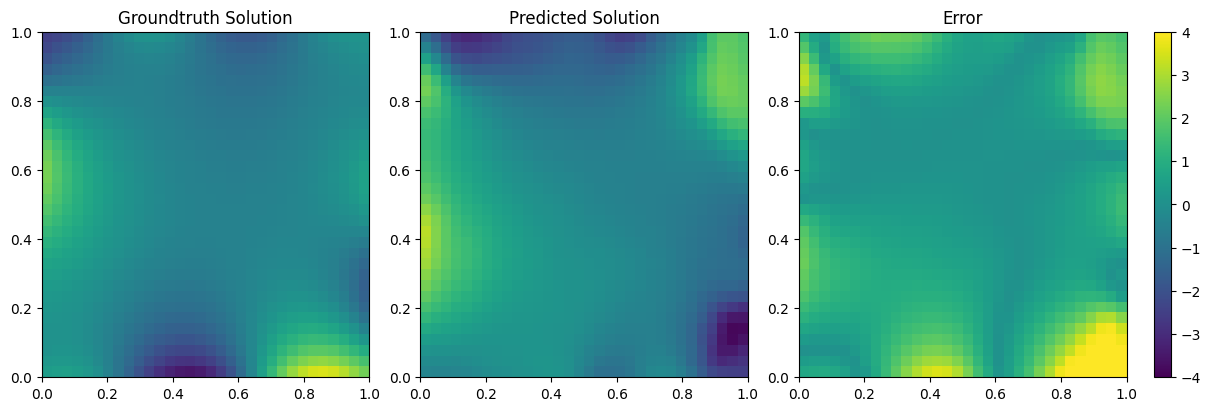

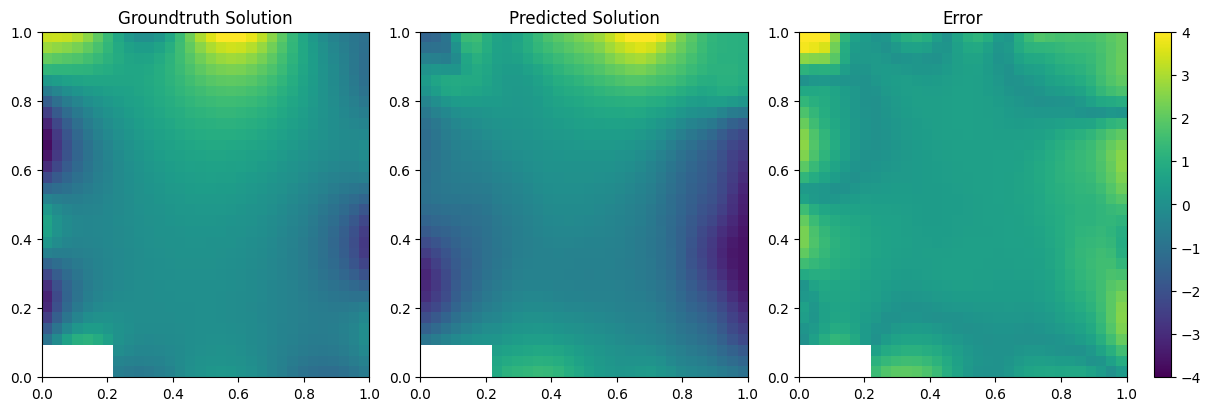

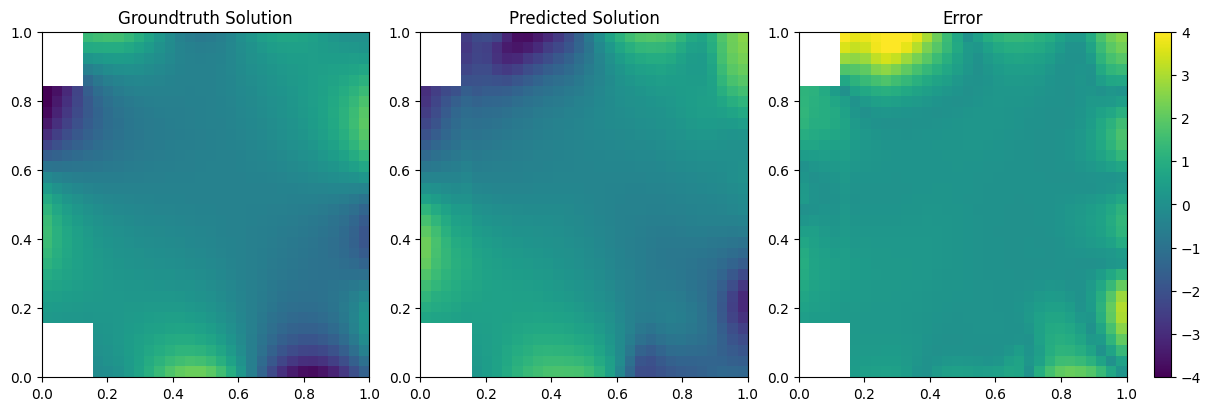

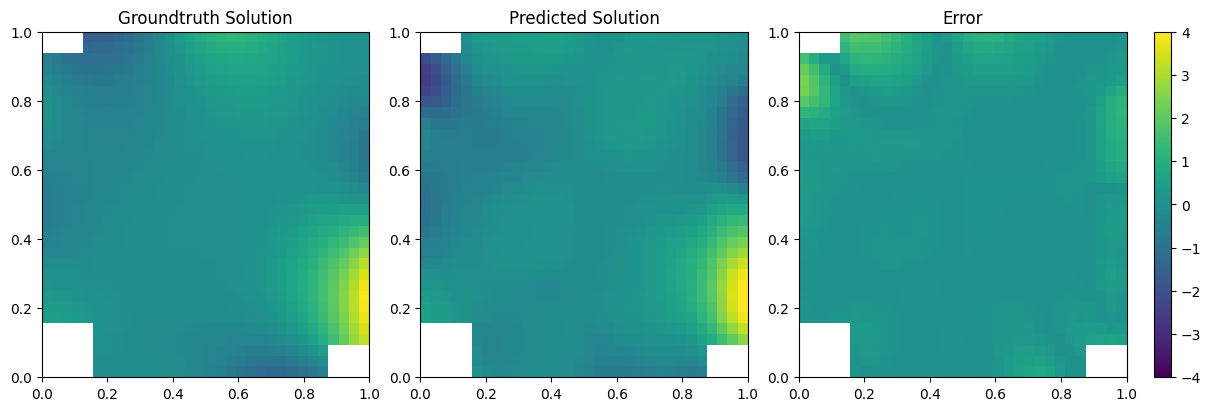

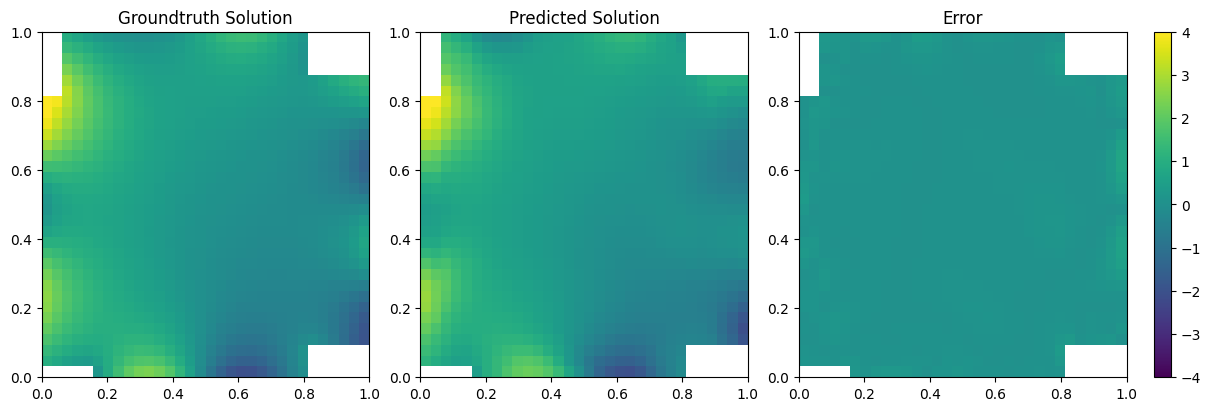

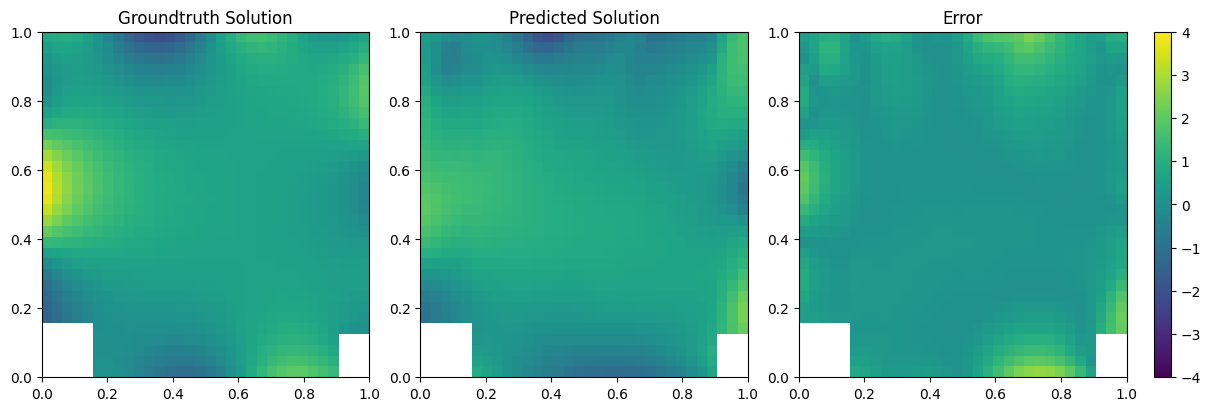

In [35]:

shapes = ["0c","1c","2c","3c","4c", "mix"]

for shape in shapes:
    f_all = np.load(os.path.join(DATA_PATH, "Dirichlet/100/RHS_N32_"+ str(shape) +"_100.npy")) # the source function
    sol_all = np.load(os.path.join(DATA_PATH, "Dirichlet/100/SOL_N32_"+ str(shape) +"_100.npy")) # the solution
    bc_all=np.load(os.path.join(DATA_PATH, "Dirichlet/100/BC_N32_"+ str(shape) +"_100.npy")) # the boundary condition

    data_train, data_test, coord_all, u_normalizer = make_graph(f_all, bc_all, sol_all, resolution, ntrain, ntest)

    train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(data_test, batch_size=batch_size2, shuffle=False)

    model.eval()
    test_l2 = 0.0
    test_mse = 0.0

    with torch.no_grad():
        for batch in train_loader:
            batch = batch.to(device)
            out = model(batch)
            loss = F.mse_loss(out.view(-1, 1), batch['G1+2'].y.view(-1,1))
            test_mse += loss.item()
            out = u_normalizer.decode(out.view(batch_size2,-1), sample_idx=batch['G1'].sample_idx.view(batch_size2,-1))
            test_l2 += myloss(out, batch['G1+2'].y.view(batch_size2, -1)).item()

        for batch in test_loader:
            batch = batch.to(device)
            out = model(batch)
            loss = F.mse_loss(out.view(-1, 1), batch['G1+2'].y.view(-1,1))
            test_mse += loss.item()
            out = u_normalizer.decode(out.view(batch_size2,-1), sample_idx=batch['G1'].sample_idx.view(batch_size2,-1))
            test_l2 += myloss(out, batch['G1+2'].y.view(batch_size2, -1)).item()

        i = 0
        batch = data_train[i]
        out = model(batch.to(device))
        # Plot an example
        #out = u_normalizer.decode(out.view(batch_size2,-1), sample_idx=batch['G1'].sample_idx.view(batch_size2,-1))
        plot_file = 'Resolution_' + str(s) + '_poisson' + \
            '_ntrain'+str(ntrain)+'_kerwidth'+str(ker_width) + '_bd_enc_' + args.boundary_encoding + str(args.trans_layer) +\
            '_shape' + str(args.bd_shape) +'_Rolling' + args.init_boudary_loc+'_ns'+str(args.ns)+\
            '_nheads'+str(args.n_heads)+'_bddim'+str(args.boundary_dim)+"_act"+args.act+'lr'+str(args.lr)+'_nmlp_layers'+str(args.nmlp_layers)+'_epochs' + str(args.epochs) +"_test_" + shape + ".png"

        plots_path = os.path.join(cwd, "plots")
        plot_path = os.path.join(plots_path, plot_file)

        num_points = len(coord_all[i, :, :])
        length = int(np.sqrt(num_points))
        idx = batch['G1'].sample_idx.cpu().numpy()

        x_mesh = coord_all[i,:, 0].reshape(32, 32)
        y_mesh = coord_all[i,:, 1].reshape(32, 32)
        y_true = np.zeros(num_points)
        y_pred = np.zeros(num_points)
        y = batch['G1+2'].y.detach().to('cpu')
        y_true[np.array(idx)] = y.numpy()  # No need to detach or move to CPU again
        y_pred[np.array(idx)] = out.squeeze().cpu().numpy()


        mask = np.zeros((len(coord_all[i, :, :])), dtype=bool)
        mask[idx] = True
        y_true_masked = np.ma.masked_where(~mask, y_true)
        y_pred_masked = np.ma.masked_where(~mask, y_pred)

        fig, (ax3, ax4, ax5) = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)


        absmax = np.max(np.hstack((np.abs(y_true_masked), np.abs(y_pred_masked))))
        pcm = ax3.pcolormesh(x_mesh, y_mesh, y_true_masked.reshape(32, 32), shading='auto', cmap="viridis", vmin=-4, vmax=4)

        ax3.set_title("Groundtruth Solution")

        pcm = ax4.pcolormesh(x_mesh, y_mesh, y_pred_masked.reshape(32, 32), shading='auto', cmap="viridis", vmin=-4, vmax=4)

        ax4.set_title("Predicted Solution")

        pcm = ax5.pcolormesh(x_mesh, y_mesh, np.abs(y_pred_masked - y_true_masked).reshape(32, 32), shading='auto', cmap="viridis", vmin=-4, vmax=4)
        fig.colorbar(pcm, ax=ax5)

        ax5.set_title("Error")

        plt.savefig(plot_path)



    print(f"Shape: {shape}")
    print(f"Test MSE: {test_mse/100:.6f}")
    print(f"Test L2: {test_l2/100:.6f}")



In [ ]:
cwd = os.getcwd()
plot_file = 'Resolution_' + str(s) + '_poisson' + \
    '_ntrain'+str(ntrain)+'_kerwidth'+str(ker_width) + '_bd_enc_' + args.boundary_encoding + str(args.trans_layer) +\
     '_shape' + str(args.bd_shape) +'_Rolling' + args.init_boudary_loc+'_ns'+str(args.ns)+\
    '_nheads'+str(args.n_heads)+'_bddim'+str(args.boundary_dim)+"_act"+args.act+'lr'+str(args.lr)+'_nmlp_layers'+str(args.nmlp_layers)+'_epochs' + str(args.epochs) +"_test_1c.png"

plots_path = os.path.join(cwd, "plots")
plot_path = os.path.join(plots_path, plot_file)


In [ ]:
batch['G1+2'].y.cpu().detach().numpy().shape

(965,)

In [ ]:
num_points = len(coord_all[i, :, :])
length = int(np.sqrt(num_points))
idx = batch['G1'].sample_idx.cpu().numpy()

x_mesh = coord_all[i,:, 0].reshape(32, 32)
y_mesh = coord_all[i,:, 1].reshape(32, 32)
y_true = np.zeros(num_points)
y_pred = np.zeros(num_points)
y = batch['G1+2'].y.detach().to('cpu')
print(y.device)
y = batch['G1+2'].y.detach().cpu().clone()  # Move to CPU once
print(y.device)
y_true[np.array(idx)] = y.numpy()  # No need to detach or move to CPU again
y_pred[np.array(idx)] = out.squeeze().cpu().numpy()


mask = np.zeros((len(coord_all[i, :, :])), dtype=bool)
mask[idx] = True
y_true_masked = np.ma.masked_where(~mask, y_true)
y_pred_masked = np.ma.masked_where(~mask, y_pred)



cpu
cpu


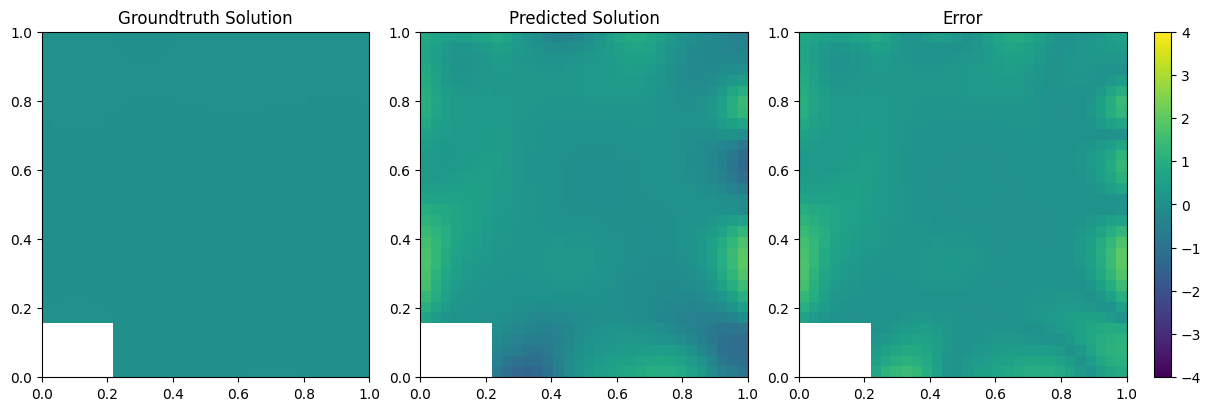

In [ ]:

fig, (ax3, ax4, ax5) = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)


absmax = np.max(np.abs(all_u[i]))
pcm = ax3.pcolormesh(x_mesh, y_mesh, y_true_masked.reshape(32, 32), shading='auto', cmap="viridis", vmin=-4, vmax=4)

ax3.set_title("Groundtruth Solution")

absmax = np.max(np.abs(all_u[i]))
pcm = ax4.pcolormesh(x_mesh, y_mesh, y_pred_masked.reshape(32, 32), shading='auto', cmap="viridis", vmin=-4, vmax=4)

ax4.set_title("Predicted Solution")

absmax = np.max(np.abs(all_u[i]))
pcm = ax5.pcolormesh(x_mesh, y_mesh, np.abs(y_pred_masked - y_true_masked).reshape(32, 32), shading='auto', cmap="viridis", vmin=-4, vmax=4)
fig.colorbar(pcm, ax=ax5)

ax5.set_title("Error")

plt.savefig(plot_path)


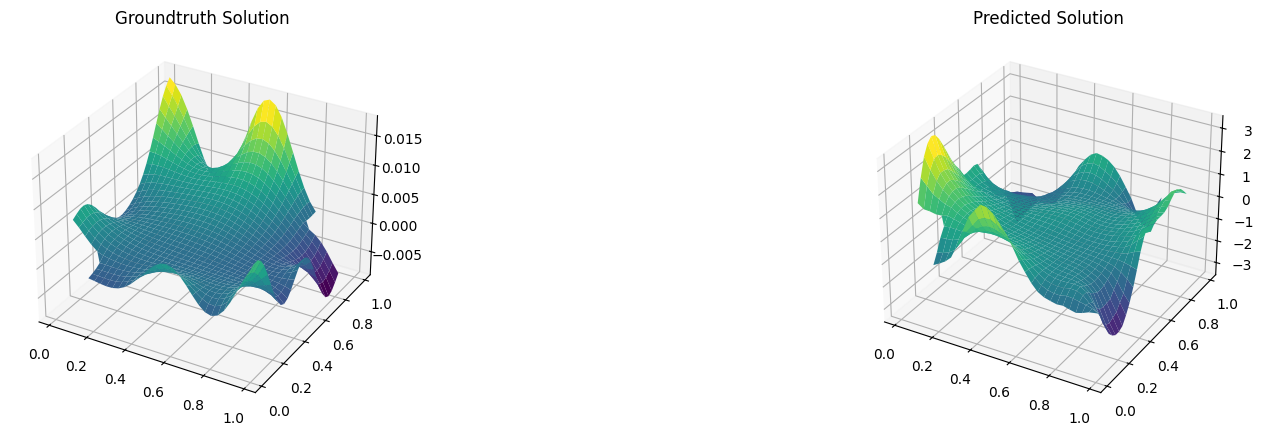

In [ ]:

fig, (ax3, ax4) = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(20, 5))


ax3.plot_surface(x_mesh, y_mesh,  y_true_masked.reshape(32, 32), cmap="viridis")
ax3.set_title("Groundtruth Solution")

x_mesh_bc = bc_euco[i][:,0]
y_mesh_bc = bc_euco[i][:,1]

ax4.plot_surface(x_mesh, y_mesh, y_pred_masked.reshape(32, 32), cmap="viridis")
ax4.set_title("Predicted Solution")
plt.show()

In [ ]:
loss = F.mse_loss(out.view(-1, 1), batch['G1+2'].y.view(-1,1))
loss

tensor(0.6564, device='cuda:0')

In [ ]:
l2 = myloss(
            u_normalizer.decode(out.view(batch_size, -1), sample_idx=batch['G1'].sample_idx.view(batch_size, -1)),
            u_normalizer.decode(batch['G1+2'].y.view(batch_size, -1), sample_idx=batch['G1'].sample_idx.view(batch_size, -1)))

In [ ]:
l2

tensor(41.7743, device='cuda:0')